# Análise das Características do Solo ideiais para cada Cultura

## Projeto da disciplina SME0860 - Aprendizado de Máquina Aplicado a Problemas

### Membros

* Alexandre E. de Souza Jesus - alexandre_souza@usp.br - **12559506**

* Eduardo Zaffari Monteiro - **12559490**

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - **12559472**

# 1. Introdução

# 2. Metodologia

# 3. Compreensão dos Dados

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Coleta dos dados

In [102]:
# Leitura dos dados
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [41]:
# Limpando dataset
df = df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)
df = df.rename(columns={"label": "crop"})
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
# Verificando as categorias de plantação
labels = df['label'].astype('category').values
labels = list(labels.categories)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

# 4. Análise Exploratória dos Dados

## Medidas descritivas

In [19]:
# Função para calcular o coeficiente de variância (CV)
def coeficiente_variancia(table):
    return 100 * table.std() / table.mean()

# Função para calcular a amplitude
def amplitude(table):
    return table.max() - table.min()

# Aplicando medidas de posição e dispersão aos atributos preditivos
medidas_descritivas = df.drop(["label"], axis=1).agg(["min", "max", "mean", "median", "var", "std", coeficiente_variancia, amplitude])

In [22]:
# Renomeando das medidas descritivas
novos_nomes = {
    "min":"Minimo",
    "max": "Maximo",
    "mean":"Media",
    "median": "Mediana",
    "var": "Variancia",
    "std": "Desvio-padrao",
    "coeficiente_variancia":"Coeficiente de Variancia",
    "amplitude": "Amplitude"
}

medidas_descritivas = medidas_descritivas.rename(novos_nomes)

# Arredondando casas decimais das medidas descritivas e de dispersão
medidas_descritivas = medidas_descritivas.round(3)

In [23]:
medidas_descritivas

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Minimo,0.000,5.000,5.000,8.826,14.258,3.505,20.211
Maximo,140.000,145.000,205.000,43.675,99.982,9.935,298.560
Media,50.552,53.363,48.149,25.616,71.482,6.469,103.464
Mediana,37.000,51.000,32.000,25.599,80.473,6.425,94.868
Variancia,1362.890,1088.068,2565.213,25.642,495.677,0.599,3020.424
Desvio-padrao,36.917,32.986,50.648,5.064,22.264,0.774,54.958
Coeficiente de Variancia,73.029,61.814,105.190,19.768,31.146,11.963,53.119
Amplitude,140.000,140.000,200.000,34.850,85.724,6.430,278.349


A partir das medidas descritivas, pode-se ter uma ideia inicial da distribuições das características. Enquanto as variáveis *temperature* e *pH* possuem uma curva simétrica, já que suas médias e medianas são bem próximas. Quanto a *humidty*, sua curva é provavelmente assimétrica à esquerda, enquanto que para todos os outros atributos as curvas são assimétricas à direita.

No que tange as medidas de dispersão, a análise anterior é reforçada. As medidas de variância e desvio-padrão apresentam valores altos para as variáveis que não são simétricas, o que indica que há uma alta variabilidade nos dados. Ou seja, há valores que possuem uma grande distância da média.

## Visualização dos Dados

### Histogramas

Abaixo, é possível observar o formato da curva dos atributos. Assim, há ainda mais evidências de que a análise anteriormente feita está, provavelmente, correta. Fazem-se necessários, então, testes de hipóteses.

<Axes: xlabel='Nitrogen', ylabel='Count'>

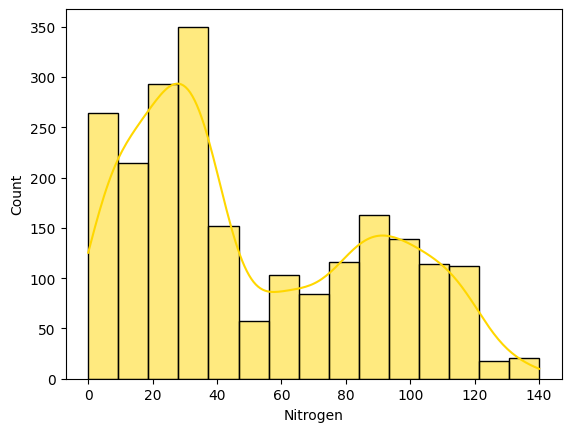

In [86]:
# Nitrogen
sns.histplot(data=df, x="Nitrogen", kde=True, color="gold")

<Axes: xlabel='phosphorus', ylabel='Count'>

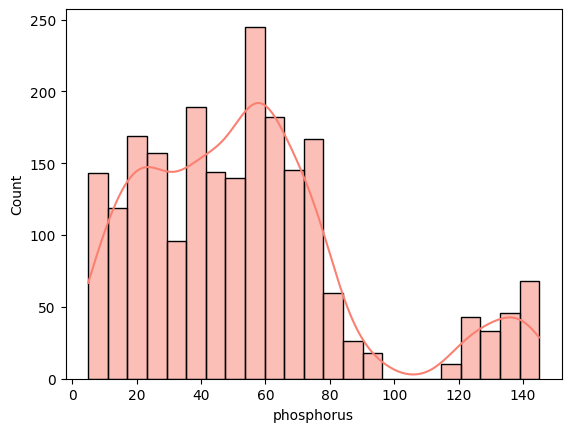

In [87]:
# Phosphorus
sns.histplot(data=df, x="phosphorus", kde=True, color="salmon")

<Axes: xlabel='potassium', ylabel='Count'>

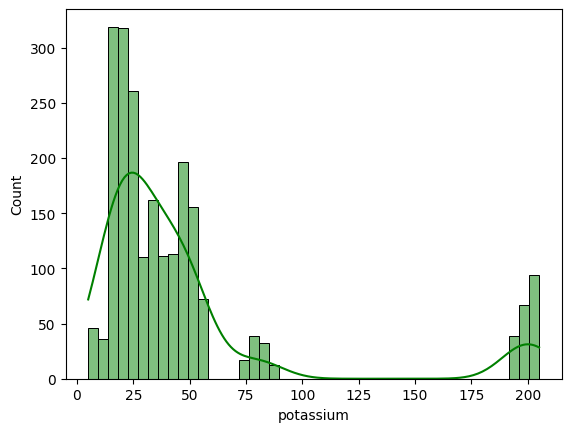

In [88]:
# Potassium
sns.histplot(data=df, x="potassium", kde=True, color="green")

<Axes: xlabel='temperature', ylabel='Count'>

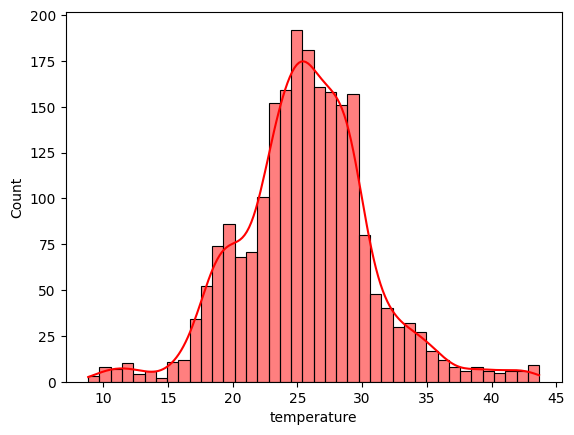

In [85]:
# temperature
sns.histplot(data=df, x="temperature", kde=True, color="red")

Percebe-se que a distribuição dos dados provavelmente segue uma distribuição normal.

<Axes: xlabel='humidity', ylabel='Count'>

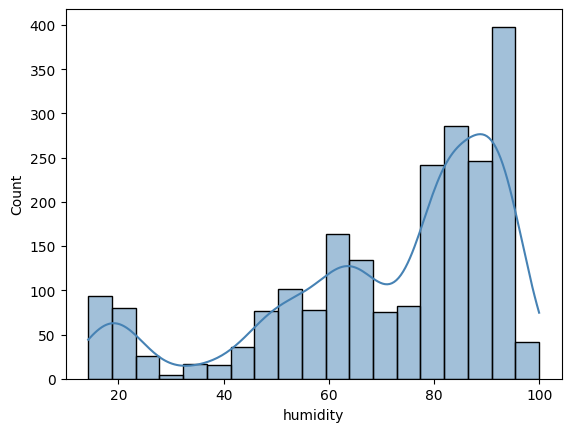

In [83]:
# Humidity
sns.histplot(data=df, x="humidity", kde=True, color="steelblue")

<Axes: xlabel='ph', ylabel='Count'>

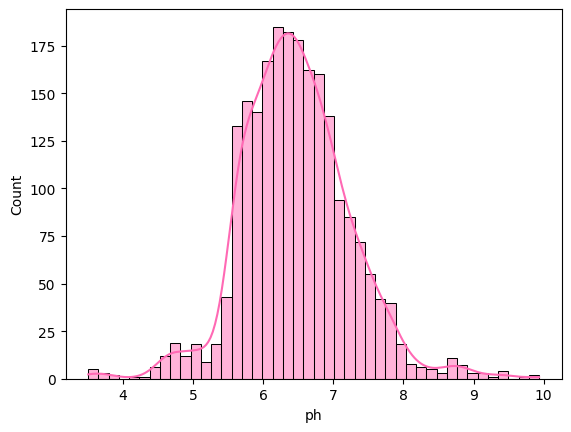

In [79]:
# ph
sns.histplot(data=df, x="ph", kde=True, color="hotpink")

Percebe-se que a distribuição dos dados provavelmente segue uma distribuição normal.

<Axes: xlabel='rainfall', ylabel='Count'>

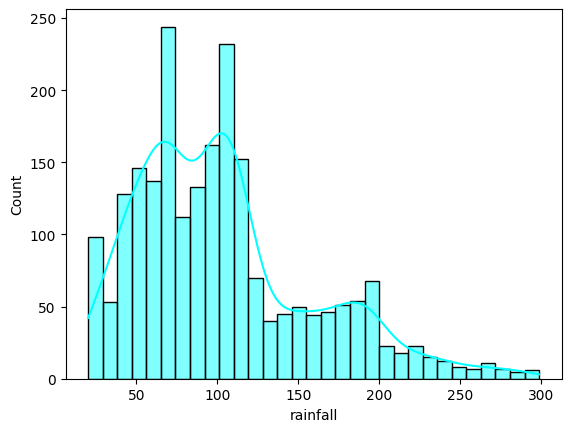

In [103]:
## Rainfall
sns.histplot(data=df, x="rainfall", kde=True, color="aqua")

### Boxplots

Com os *boxplots*, é possível comparar a distribuição dos dados em relação ao atributo-alvo. Mais uma vez, a teoria de que as variáveis *pH* e *temperature* são mais balanceadas é corroborada.

<Axes: xlabel='Nitrogen', ylabel='crop'>

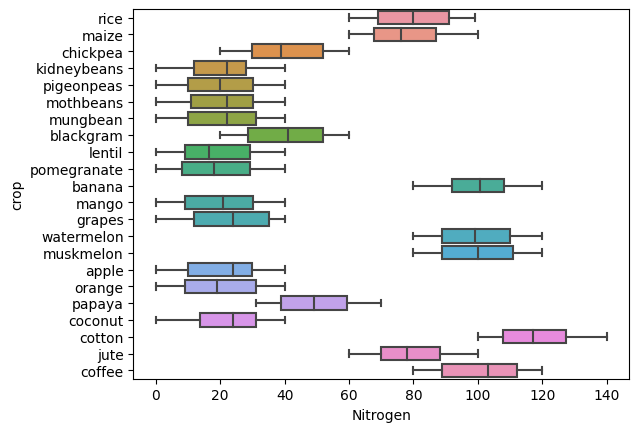

In [42]:
# --------------------
#   Nitrogen x Crop
# --------------------

sns.boxplot(x=df["Nitrogen"], y=df["crop"])

<Axes: xlabel='phosphorus', ylabel='crop'>

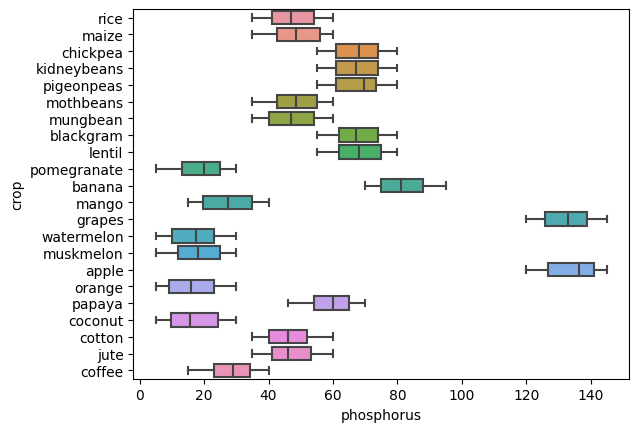

In [44]:
# ----------------------
#   Phosphorus x Crop
# ----------------------

sns.boxplot(x=df["phosphorus"], y=df["crop"])

<Axes: xlabel='potassium', ylabel='crop'>

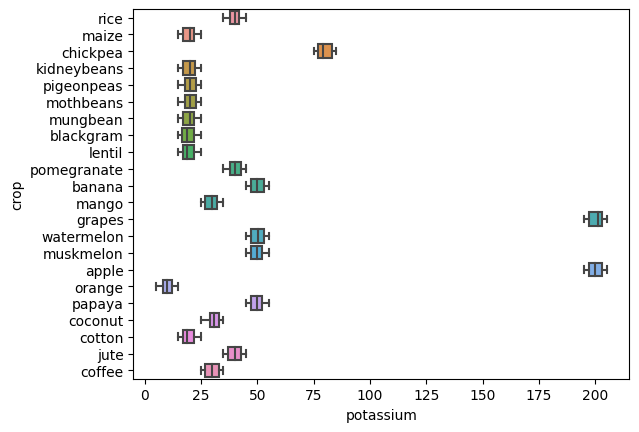

In [45]:
# ---------------------
#   Potassium x Crop
# ---------------------

sns.boxplot(x=df["potassium"], y=df["crop"])

<Axes: xlabel='temperature', ylabel='crop'>

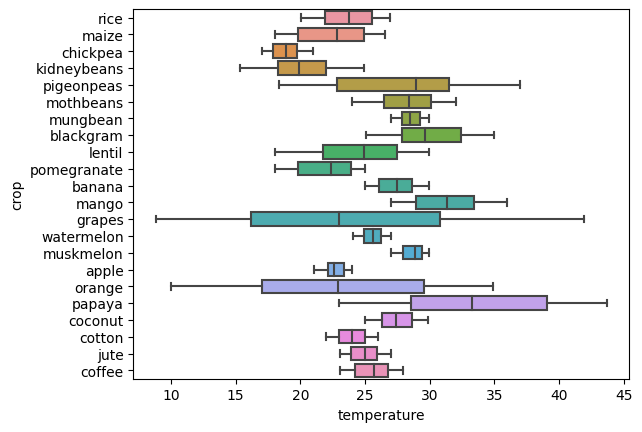

In [46]:
# ----------------------
#   Temperature x Crop
# ----------------------

sns.boxplot(x=df["temperature"], y=df["crop"])

A maior parte dos valores está ao redor da média, que é de aproximadamente 25. Apesar de certos valores apresentarem grande variação, como *grapes* e *orange*, isso não afetou a curva.

<Axes: xlabel='humidity', ylabel='crop'>

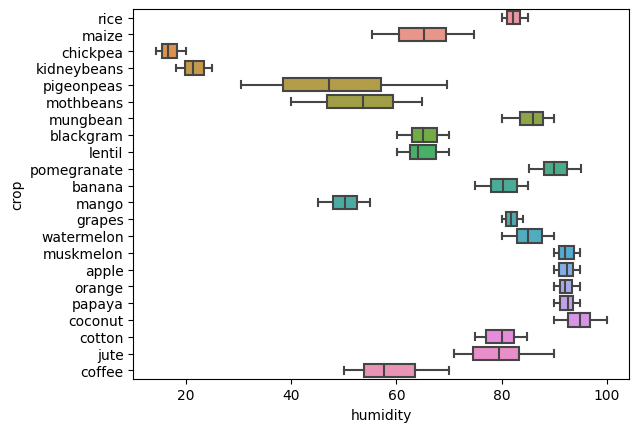

In [47]:
# --------------------
#   Humidity x Crop
# --------------------

sns.boxplot(x=df["humidity"], y=df["crop"])

<Axes: xlabel='ph', ylabel='crop'>

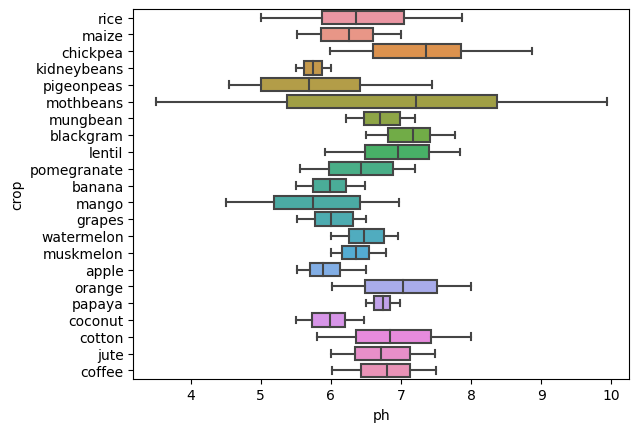

In [48]:
# --------------
#   ph x Crop
# --------------

sns.boxplot(x=df["ph"], y=df["crop"])

O padrão se repete com o atributo *pH*. A maior parte dos valores está concentrada ao redor da média. Neste caso, tal resultado é previsível, visto que essa medida varia entre 0 e 14, e 7 representa um meio neutro (a média dos valores foi de aproximadamente 6,4)

<Axes: xlabel='rainfall', ylabel='crop'>

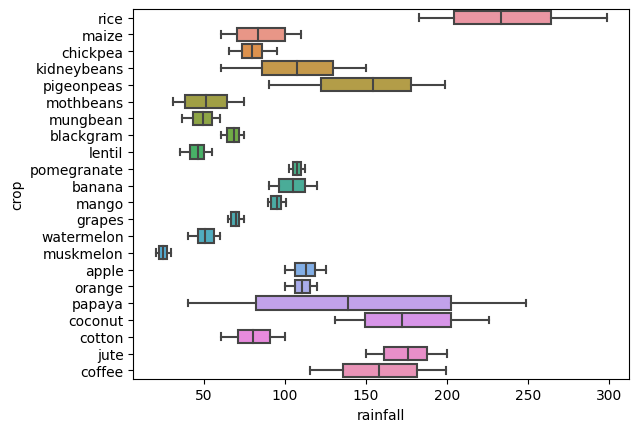

In [49]:
# --------------------
#   Rainfall x Crop
# --------------------

sns.boxplot(x=df["rainfall"], y=df["crop"])

É possível perceber, então, que há certa separação no que tange aos atributos para cada tipo de cultura. Há indícios, portanto, de que é possível classificar o rótulo de novas observações a partir deste conjunto de variáveis.

### Balaceamento dos Dados

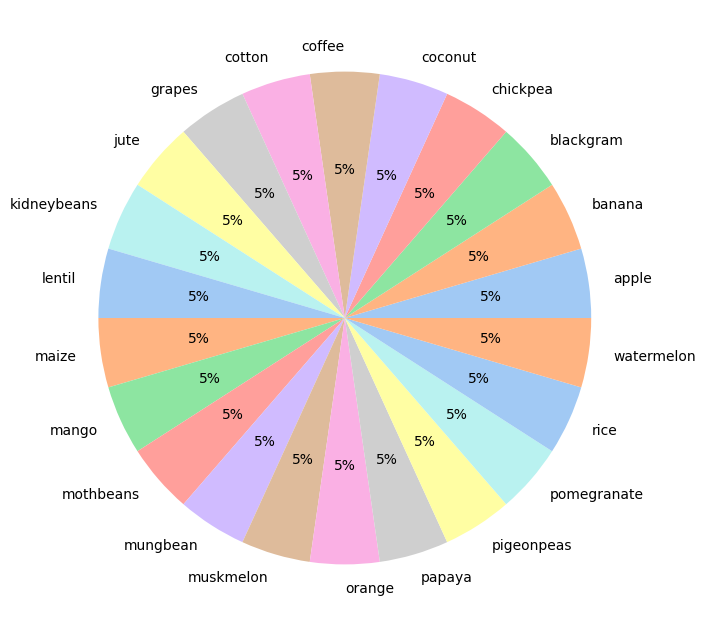

In [50]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')

plt.pie(df['crop'].groupby(df['crop']).count(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

É possível perceber que a distribuição dos valores é idêntica.

### Correlação entre as Variáveis

<Axes: >

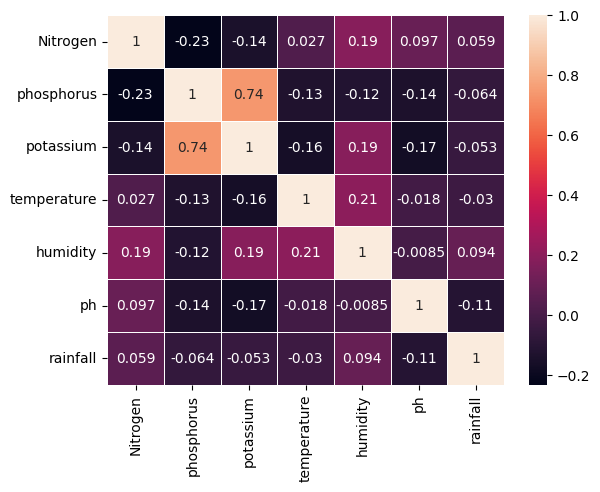

In [95]:
# Mapa de calor com as correlações entre os atributos
sns.heatmap(df.drop(columns=["crop"]).corr(), annot=True, linewidths=0.5)

A maior parte das variáveis **não** estão relacionadas entre si, com exceção dos atributos "potassium" e "phosphorus", que possuem uma correlação positiva considerável. Abaixo é possível visualizar uma matriz de dispersão:

<Axes: >

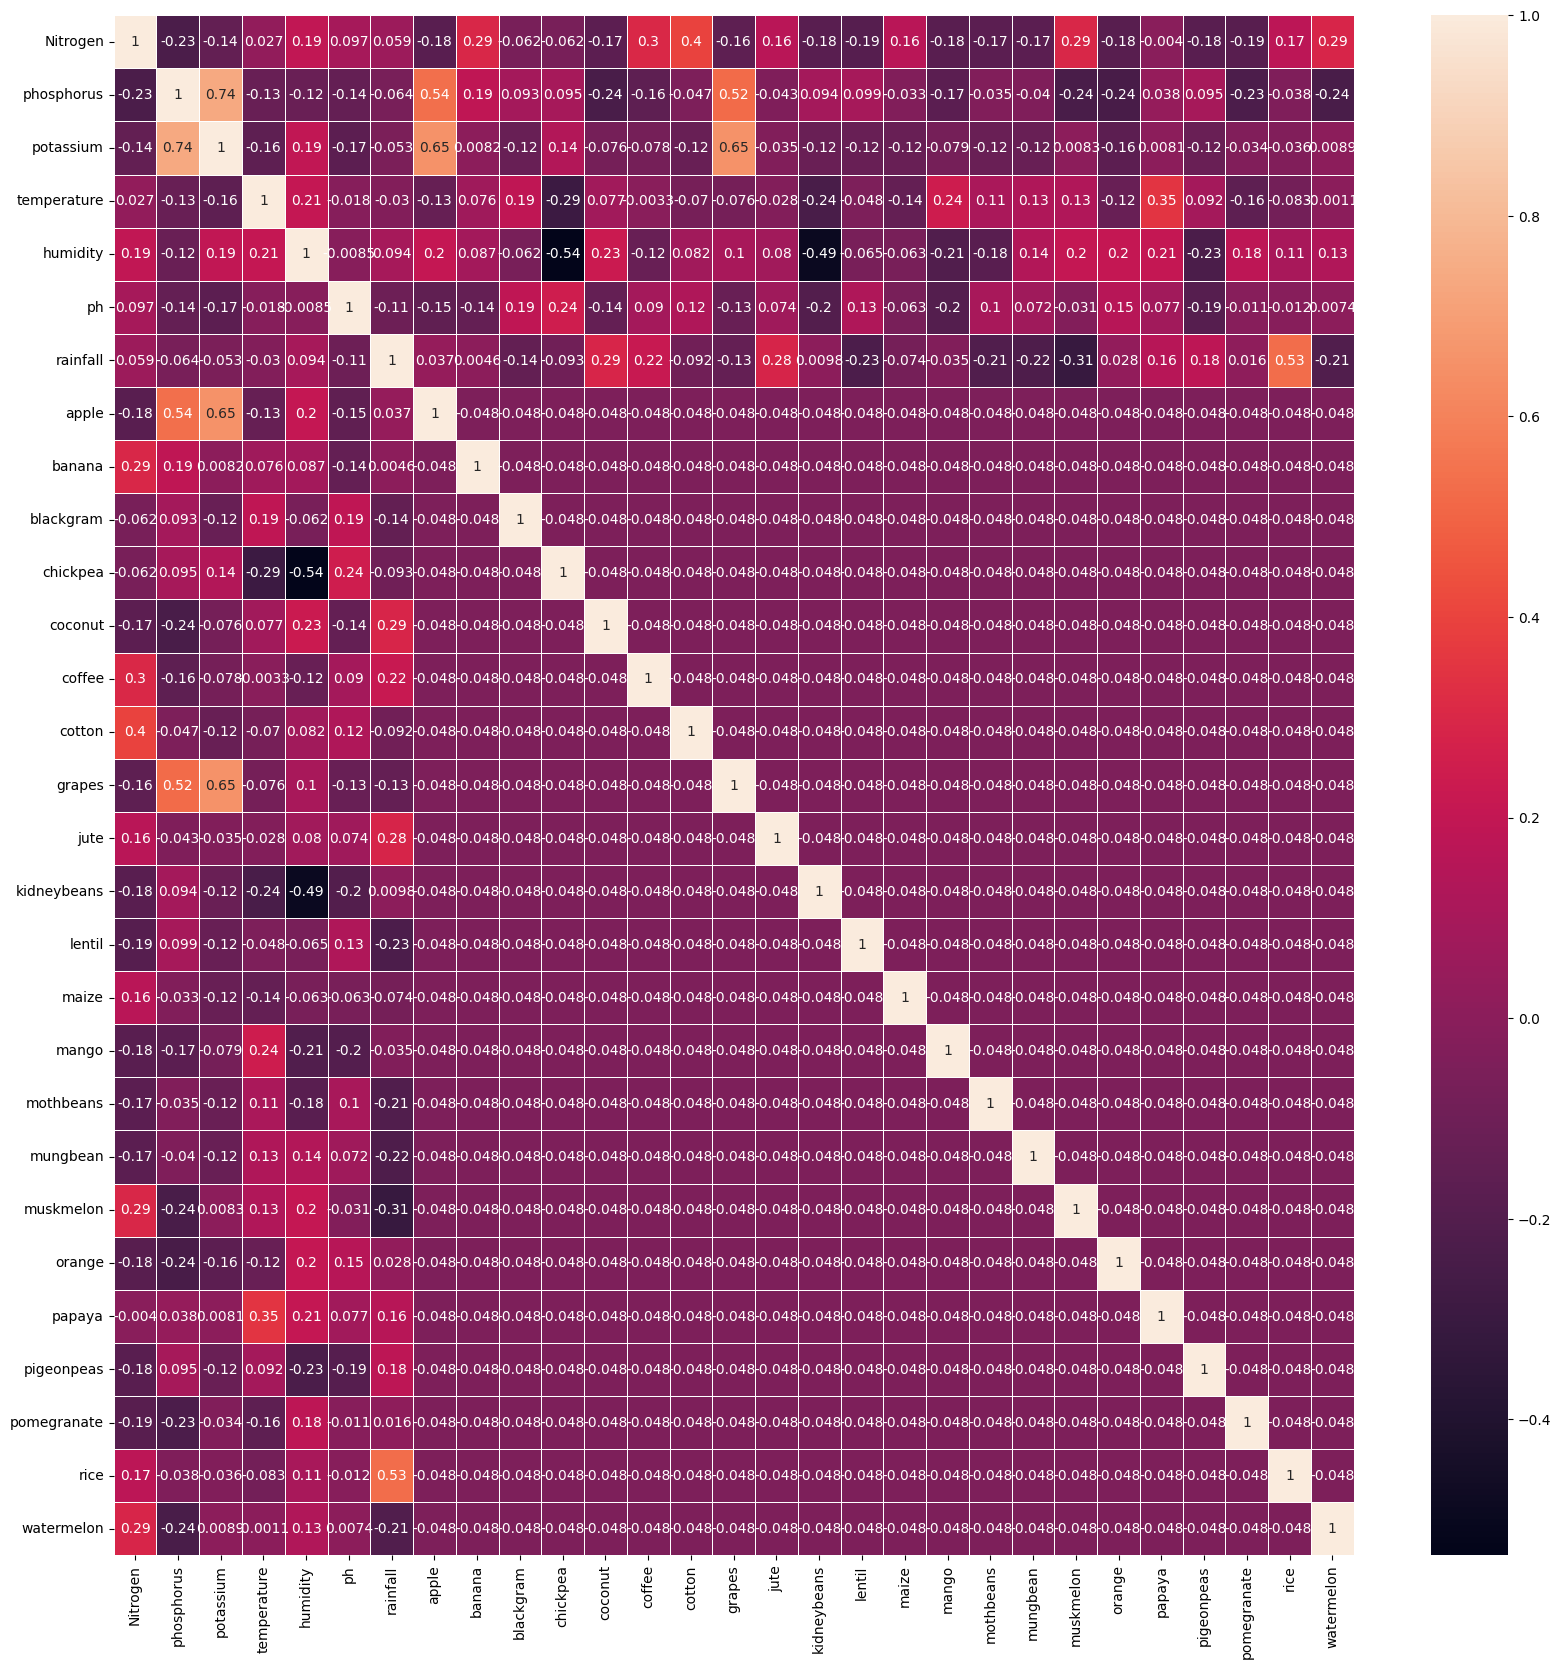

In [101]:
dummies = pd.get_dummies(df['crop'])
dummy_df = pd.concat([df, dummies], axis=1)

plt.figure(figsize=(20, 20))
corr = dummy_df.drop(columns=["crop"]).corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

É possível perceber que dentre elas a que possui maior relação com os atributos-alvo é a *potassium*. 

### Pairplot

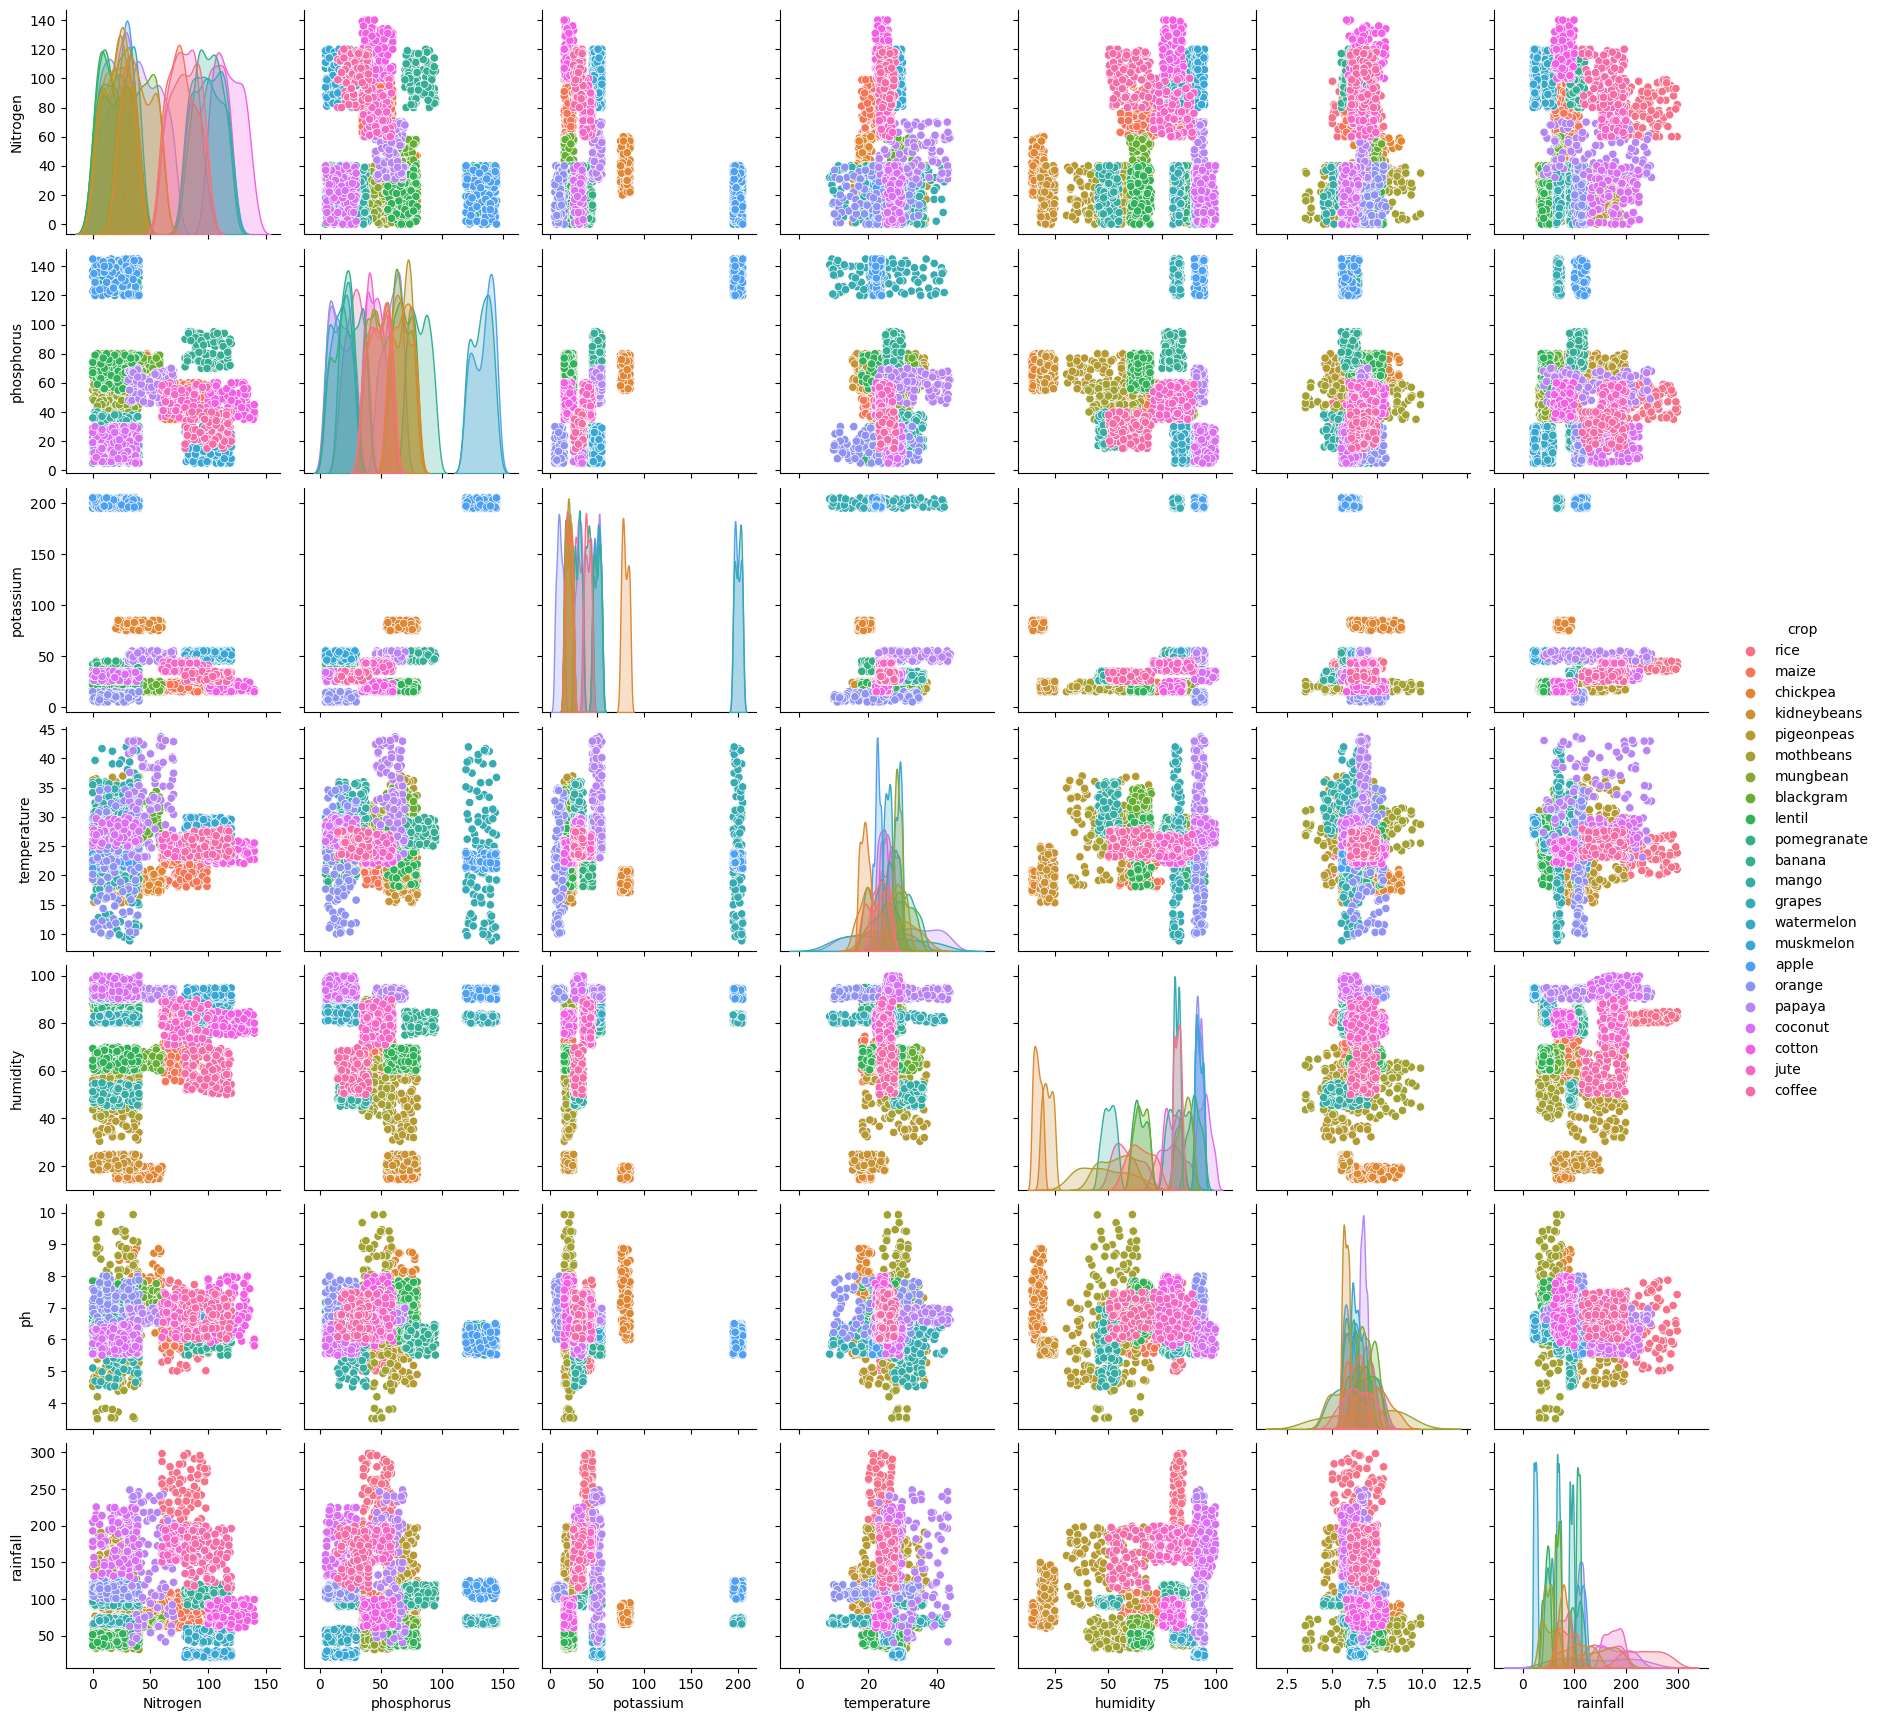

In [93]:
sns.pairplot(df, hue='crop')

# 5. Treinamento dos Modelos

# 6. Avaliação dos Modelos

# 7. Referências Bibliográficas